Implimenting langgraph based simple chatbot

In [11]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

## reducers 
from typing  import Annotated
from langgraph.graph.message import add_messages

In [12]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] =  os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] =  os.getenv("GROQ_API_KEY")

In [8]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")
llm.invoke("Hello, world!")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 11, 'total_tokens': 20, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_deacdd5f6f', 'id': 'chatcmpl-CqO0lD9PMIlnpHieLSW94S6kdIHqR', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b51a5-f9f1-7801-b64f-ecd8a0d605a4-0', usage_metadata={'input_tokens': 11, 'output_tokens': 9, 'total_tokens': 20, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
from langchain_groq import ChatGroq
llm_groq = ChatGroq(model="groq/compound")
llm_groq.invoke("Hello, world!")

AIMessage(content='Hello! How can I help you today?', additional_kwargs={'reasoning_content': '<Think>\n\n</Think>'}, response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 238, 'total_tokens': 278, 'completion_time': 0.083467, 'completion_tokens_details': None, 'prompt_time': 0.00804, 'prompt_tokens_details': None, 'queue_time': 0.098418, 'total_time': 0.091507}, 'model_name': 'groq/compound', 'system_fingerprint': None, 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b51a7-63f2-7ff0-8f03-65df08371f27-0', usage_metadata={'input_tokens': 238, 'output_tokens': 40, 'total_tokens': 278})

Creating Nodes

In [13]:
def superbot(state: State) -> State:
    return {"messages":[llm_groq.invoke(state["messages"])]}

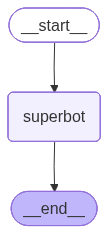

In [16]:
graph = StateGraph(State)

# nodes
graph.add_node("superbot", superbot)

# edges
graph.add_edge(START, "superbot")
graph.add_edge("superbot", END)

graph_builder = graph.compile()

## Dispaly
from IPython.display import display, Image
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [17]:
## Invocation

graph_builder.invoke({'messages':"Hi, I am Ganesh Patel"})

{'messages': [HumanMessage(content='Hi, I am Ganesh Patel', additional_kwargs={}, response_metadata={}, id='52ddb3cb-c566-4873-b754-e50a7740f8e3'),
  AIMessage(content='Hello Ganesh! Nice to meet you. How can I help you today?', additional_kwargs={'reasoning_content': '<Think>\n\n</Think>'}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 244, 'total_tokens': 326, 'completion_time': 0.170086, 'completion_tokens_details': None, 'prompt_time': 0.008301, 'prompt_tokens_details': None, 'queue_time': 0.103578, 'total_time': 0.178386}, 'model_name': 'groq/compound', 'system_fingerprint': None, 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b51b0-a6f3-7783-9998-c24ae6cc04e4-0', usage_metadata={'input_tokens': 244, 'output_tokens': 82, 'total_tokens': 326})]}

In [20]:
## streaming response

for event in graph_builder.stream({'messages':"Hi, I am Ganesh Patel"}, stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hi, I am Ganesh Patel', additional_kwargs={}, response_metadata={}, id='220be8cb-39c4-4dfa-b374-1c1455b4dbed')]}
{'messages': [HumanMessage(content='Hi, I am Ganesh Patel', additional_kwargs={}, response_metadata={}, id='220be8cb-39c4-4dfa-b374-1c1455b4dbed'), AIMessage(content='Hello Ganesh! Nice to meet you. How can I assist you today?', additional_kwargs={'reasoning_content': '<Think>\n\n</Think>'}, response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 244, 'total_tokens': 309, 'completion_time': 0.134607, 'completion_tokens_details': None, 'prompt_time': 0.008632, 'prompt_tokens_details': None, 'queue_time': 0.104064, 'total_time': 0.143238}, 'model_name': 'groq/compound', 'system_fingerprint': None, 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b51b3-e46a-7b82-904e-800343c69a71-0', usage_metadata={'input_tokens': 244, 'output_tokens': 65, 'total_tokens': 3